[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


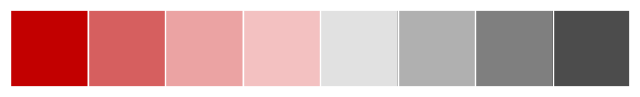

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import re
import time
import nltk
import torch
from typing import Dict, List, Optional, Union, Tuple, Callable
import math
import torch.nn as nn
import torch.nn.functional as F
import timeit
import string
import random
import zipfile
import datetime
import textwrap
#import torchtext
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
import matplotlib as mpl
import scipy.stats as st
import missingno as msno
from tqdm.auto import tqdm
from rich.text import Text
import plotly.express as px
from tensorflow import keras
from bs4 import BeautifulSoup
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
from rich.console import Console
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from transformers import pipeline
import matplotlib.ticker as ticker
import tensorflow_datasets as tfds
from keras.models import Sequential
#from torchtext import data, datasets
from keras.layers import Dense, Dropout
from IPython.display import display, HTML
#from data_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FuncFormatter
from IPython.display import HTML, display, Markdown
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, TensorDataset
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import DistilBertForSequenceClassification, AdamW, DistilBertTokenizer, BertTokenizer, BertForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score
nltk.download('stopwords')
sns.set(color_codes = True)
sns.set_palette(palette = 'RdGy', n_colors = 8)
colors = ["#C20000", "#D65F5F", "#EBA3A3", "#F3C1C1", "#E1E1E1", "#B0B0B0", "#7F7F7F", "#4C4C4C"]
sns.palplot(sns.color_palette(colors))
sns.set(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Exploratory data analysis of the product data


In [2]:
data_product=pd.read_csv('/content/product_info.csv')

In [ ]:
data_product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
#Precentage of null values in every column
data_product.isnull().sum()*100/data_product.shape[0]

,0
product_id,0.000000
product_name,0.000000
brand_id,0.000000
brand_name,0.000000
loves_count,0.000000
rating,3.272899
reviews,3.272899
size,19.201789
variation_type,17.000235
variation_value,18.813280


I recommend dropping the following columns from the dataset, as they contain a significant amount of missing values: `child_max_price`, `child_min_price`, `value_price_usd`, `sale_price_usd`, and `variation_desc`.

In [ ]:
data_product.shape

(8494, 27)

In this project, I will focus specifically on skincare products from Sephora. To ensure accurate analysis and insights, I will separate the skincare-related data from other categories, such as makeup. This approach will allow for a more precise evaluation of trends and performance within the skincare segment.

In [3]:
string_to_check =['Remover' , 'remover' , 'Cleanser' , 'cleanser' , 'Make up cleanser' , 'bb cream' , 'bbcream' , 'BB' , 'Mask' , 'Masks' , 'mask' , 'Lip balm' , 'lip balm' , 'balm' , 'Gel' , 'gel' , 'make up remover' , 'Make up remover' ,'Hairdresser', 'Curl','Repair','Thickening',"Hairdresser",'Heat' ,'shampoo','Shampoo','hair','haircare','Haircare','Style','Styler','style','scalp','Scalp','Conditioner','conditioner','Frizz']
data_product = data_product[data_product['product_name'].str.contains('|'.join(string_to_check))]
data_product.reset_index()

,index,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,18,P483068,ABBOTT Sampler Set,6485,ABBOTT,4493,4.8163,49.0,NaN,NaN,...,0,1,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,47,P474806,Blue Tansy Reparative Mask,6321,adwoa beauty,14660,4.7581,492.0,16 oz/ 453 mg,Size,...,0,0,1,"['Good for: Damage', 'Good for: Color Care', '...",Hair,Hair Styling & Treatments,Hair Masks,0,NaN,NaN
2,48,P457233,Baomint Leave In Conditioning Styler,6321,adwoa beauty,13333,4.3472,144.0,14 oz/ 414 mL,Size,...,0,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Hair Styling & Treatments,Leave-In Conditioner,1,13.0,13.0
3,49,P474808,Blue Tansy Leave in Conditioning Styler,6321,adwoa beauty,11674,4.5762,210.0,14 oz/ 414 mL,Size,...,0,0,0,"['Good for: Damage', 'Vegan', 'Clean at Sephor...",Hair,Hair Styling & Treatments,Leave-In Conditioner,0,NaN,NaN
4,50,P457234,Baomint Moisturizing Shampoo,6321,adwoa beauty,11122,4.1324,136.0,14 oz/ 414 mL,Size,...,0,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Shampoo & Conditioner,Shampoo,1,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,8404,P440307,Superberry Hydrate + Glow Dream Night Mask wit...,6169,Youth To The People,248887,4.3237,2354.0,2 oz/ 59 mL,Size,...,0,0,0,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Masks,Face Masks,1,18.0,18.0
1809,8405,P461555,Mini Superberry Hydrate + Glow Dream Mask,6169,Youth To The People,79524,4.3237,2354.0,0.5 oz/ 15 mL,Size,...,0,0,0,"['Good for: Dullness/Uneven Texture', 'allure ...",Skincare,Mini Size,NaN,0,NaN,NaN
1810,8418,P470065,Superclay Purify + Clear Power Mask with Niaci...,6169,Youth To The People,62672,4.4595,346.0,2.0 oz/ 60 mL,Size,...,0,0,0,"['Vegan', 'Best for Oily Skin', 'Good for: Por...",Skincare,Masks,Face Masks,0,NaN,NaN
1811,8460,P502049,Libre Eau de Parfum Lifestyle Gift Set,1070,Yves Saint Laurent,16392,4.0000,4.0,NaN,NaN,...,0,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN


In [ ]:
data_product.shape

(1813, 27)

In [ ]:
#checking for duplicates in the data
data_product.duplicated().sum()

0

In [ ]:
#checking data type of the columns
print(data_product.dtypes)

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object


#Let’s begin uncovering the story the data has to share with us.

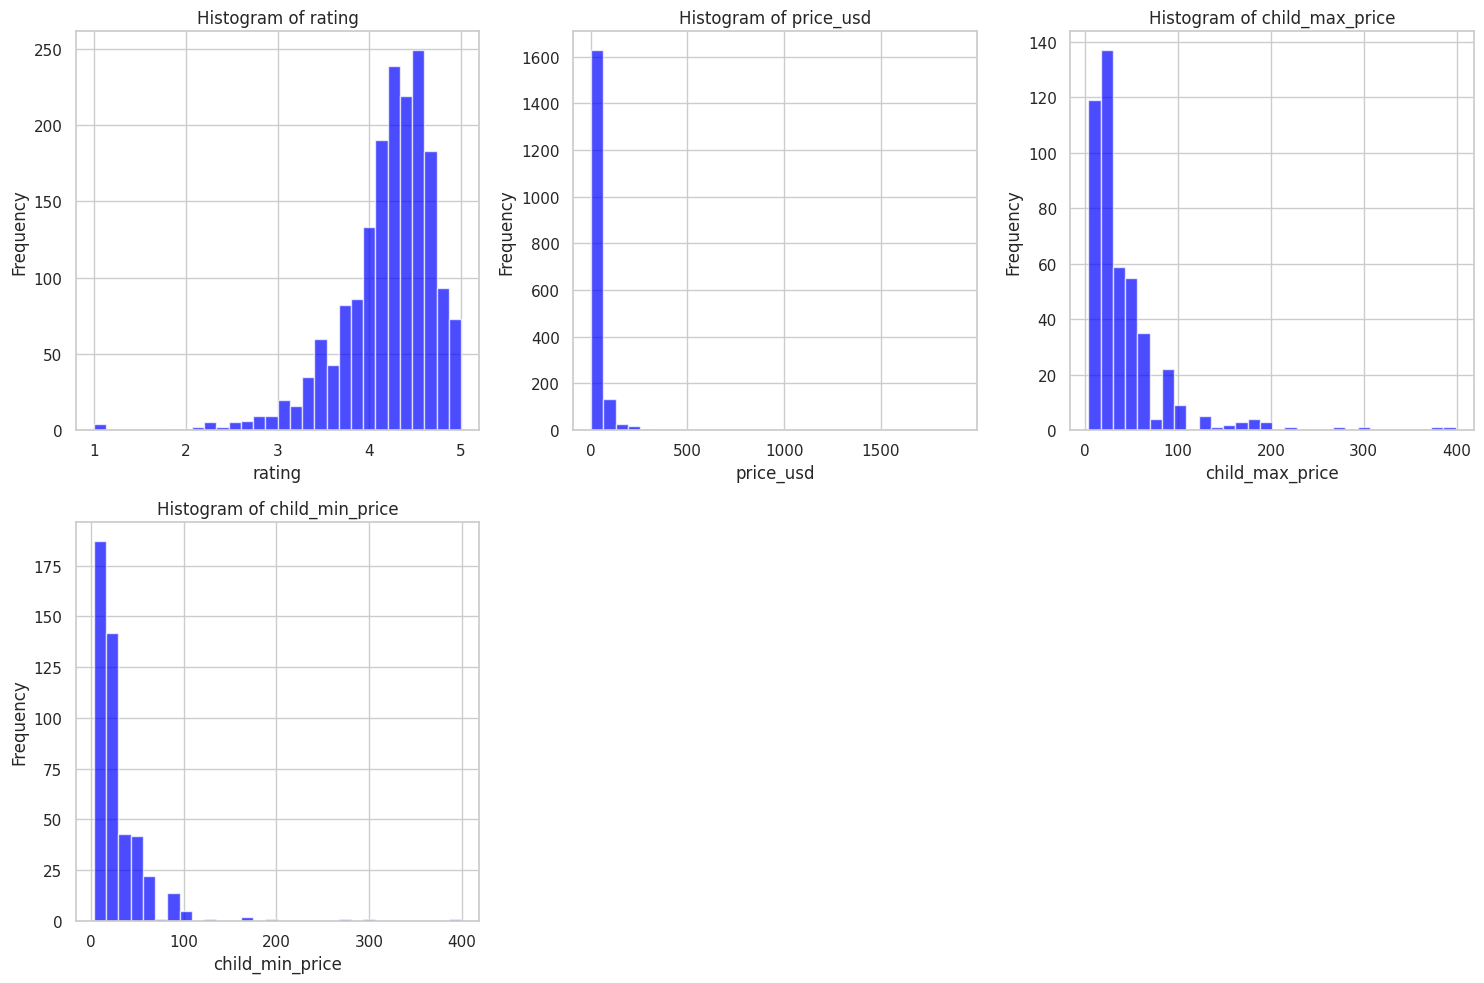

In [ ]:
columns_to_plot = [ 'rating', 'price_usd', 'child_max_price', 'child_min_price']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(data_product[column].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


As we can see, the majority of the products have a rating above 3.5, indicating that customers are generally satisfied with their purchases. Additionally, the prices for skincare products typically fall within a range of up to $80, with only a few products exceeding that price point.

In [ ]:
#checkin if there is multucoluniarity in the data using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
columns_to_multi = [ 'rating', 'price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price','loves_count','price_usd','sale_price_usd','child_max_price','child_min_price']
X = data_product[columns_to_multi].dropna()

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           feature         VIF
0           rating  150.638330
1        price_usd         inf
2   sale_price_usd         inf
3  child_max_price         inf
4  child_min_price         inf
5      loves_count   19.623535
6        price_usd         inf
7   sale_price_usd         inf
8  child_max_price         inf
9  child_min_price         inf


Examining the correlations between the columns

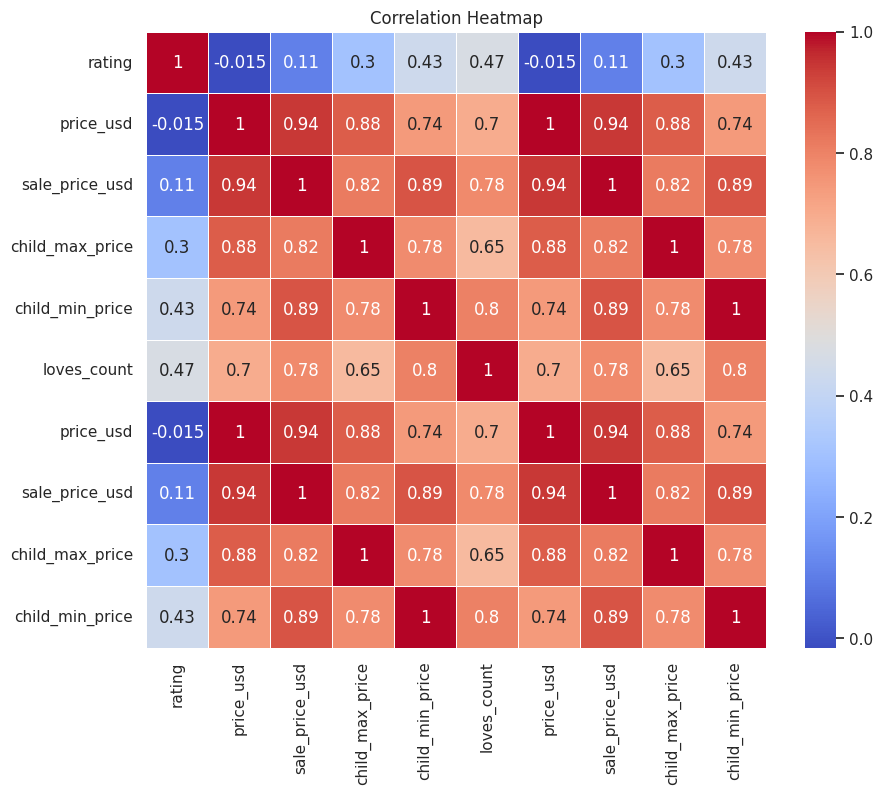

In [ ]:
columns_to_multi = [ 'rating', 'price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price','loves_count','price_usd','sale_price_usd','child_max_price','child_min_price']
df_selected = data_product[columns_to_multi].dropna()
corr_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


It is evident that there are significant correlations between various variables related to product pricing in the data. For instance, there's a strong positive correlation between `min_child_price` and `sale_price_usd`. This suggests that as the original product's price increases, the minimum price of the child product also tends to rise.

Investigating Product Categories

In [ ]:
data_product['primary_category'].unique()

array(['Fragrance', 'Hair', 'Makeup', 'Skincare', 'Mini Size',
       'Bath & Body', 'Men', 'Tools & Brushes'], dtype=object)

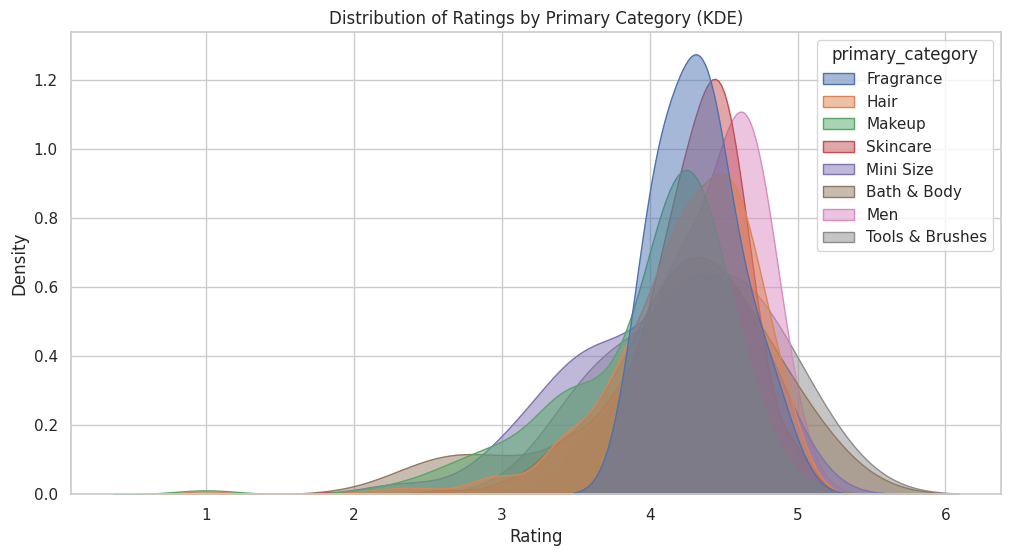

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_product, x='rating', hue='primary_category', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Ratings by Primary Category (KDE)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

The distribution varies by category, but overall, the majority of ratings seem to cluster around 4 and 5, indicating that products in these categories generally receive high ratings.Categoris Fragrance, Hair & Men This category have a relatively narrow distribution, peaking around 4.5-5. Its density is higher, indicating that most of the ratings are clustered around the high end (4.5 to 5), with few ratings below 4.

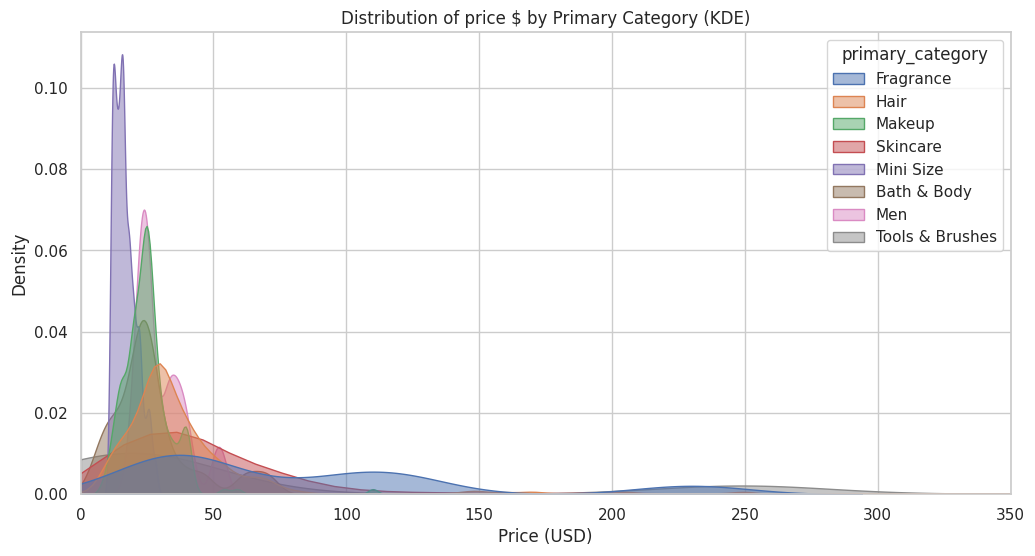

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_product, x='price_usd', hue='primary_category', common_norm=False, fill=True, alpha=0.5, bw_adjust=0.5)
plt.xlim(0, 350)
plt.title('Distribution of price $ by Primary Category (KDE)')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.show()


Fragrance and skincare products exhibit a broader price distribution compared to most other categories. While both peak below 50, fragrance products show a long tail that extends beyond 250, reflecting a wide price range, including many high-end items. Hair, makeup, and men’s products, on the other hand, have sharper peaks around 50 and 30, respectively, but their distributions are much narrower, rapidly tapering off after $50. This suggests that the majority of products in these categories are concentrated in the lower price range, typically under 50 .

Mini Size products stand out with the sharpest peak, around 10, and the narrowest distribution. This indicates that these items are tightly priced, mostly under $20, with very few products priced higher.

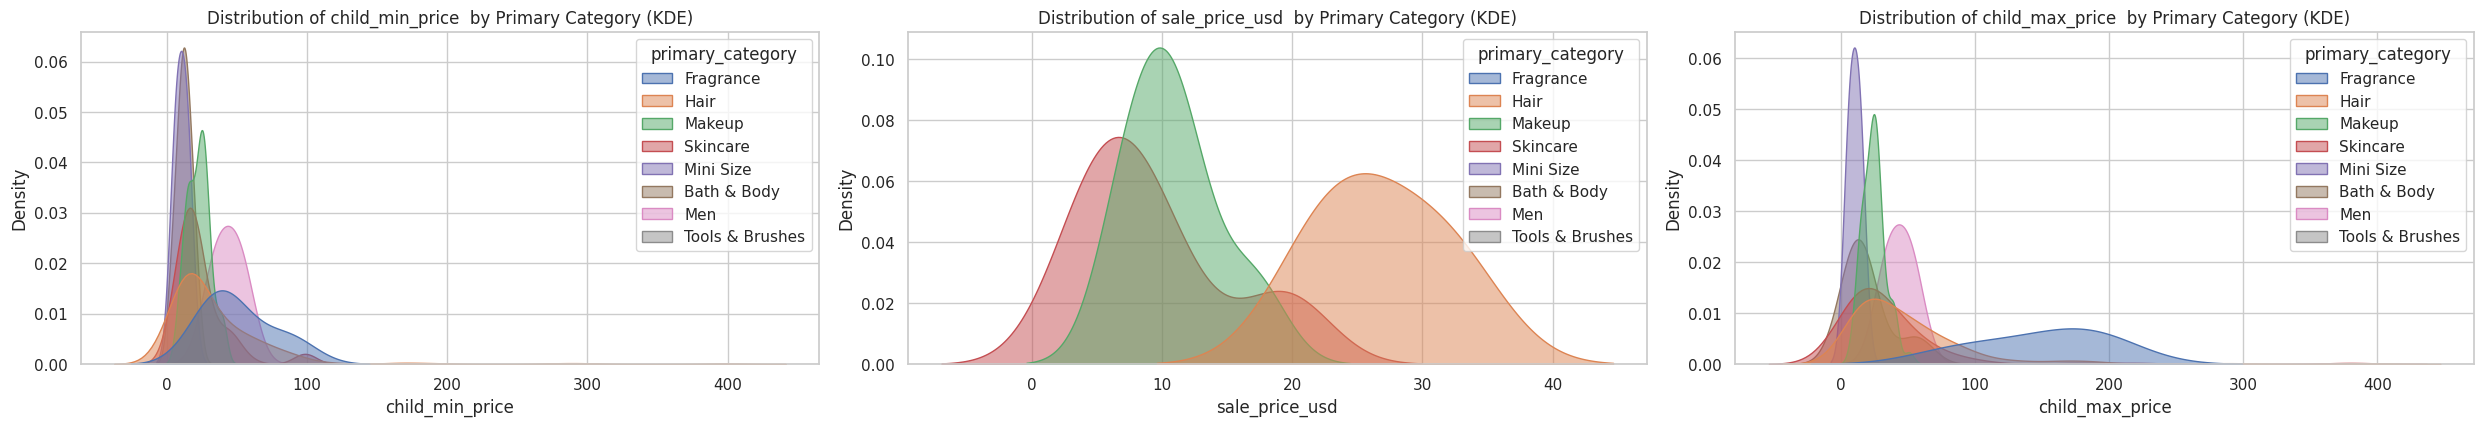

In [ ]:
columns_to_plot=['child_min_price','sale_price_usd','child_max_price']
fig = plt.figure(figsize=(25, 20))
for i,col in enumerate(columns_to_plot):
  ax = fig.add_subplot(5, 3, i + 1)
  sns.kdeplot(data=data_product, x=col, hue='primary_category', common_norm=False, fill=True, alpha=0.5)
  ax.set_title(f'Distribution of {col}  by Primary Category (KDE)')
  ax.set_xlabel(f'{col}')
  ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

As noted earlier, the fragrance category shows a broader price distribution for its subcategories, covering a wide range of minimum and maximum prices. In contrast, skincare products exhibit a narrower distribution among their subcategories, while hair products display a wider spread. Mini size, makeup, and bath products all have a more concentrated price range, with peaks around 20-30 dollars, indicating that most of the subcategory products fall within this price bracket.

In [ ]:
#measure skewnes of dara
data_product[columns_to_plot].skew(axis = 0, skipna = True)

,0
rating,-1.585977
price_usd,22.253801
reviews,7.260202
sale_price_usd,0.910900
child_max_price,3.785921
loves_count,10.104482


Looking for some outlires

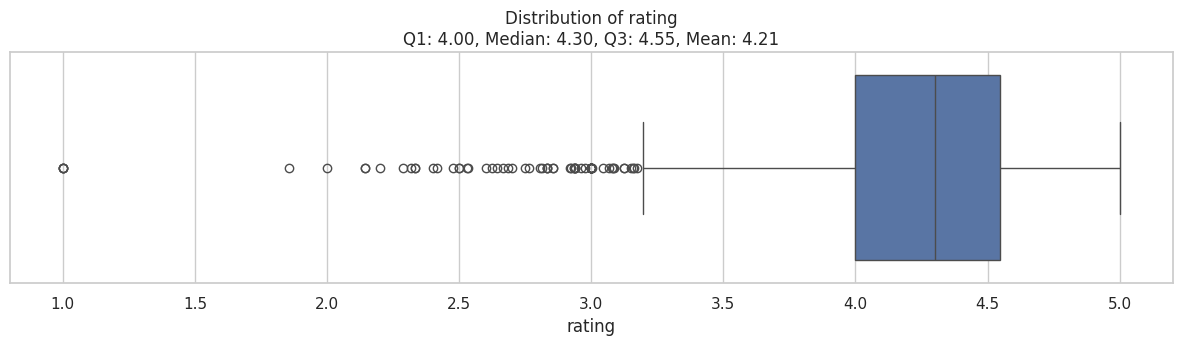

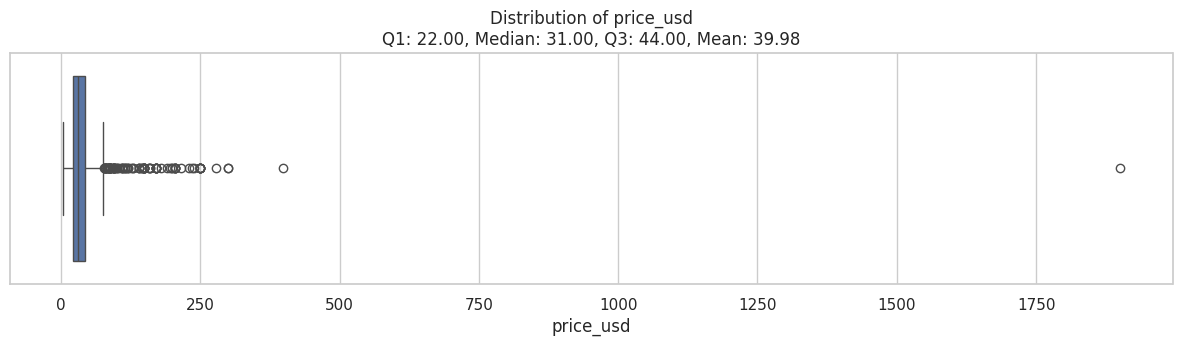

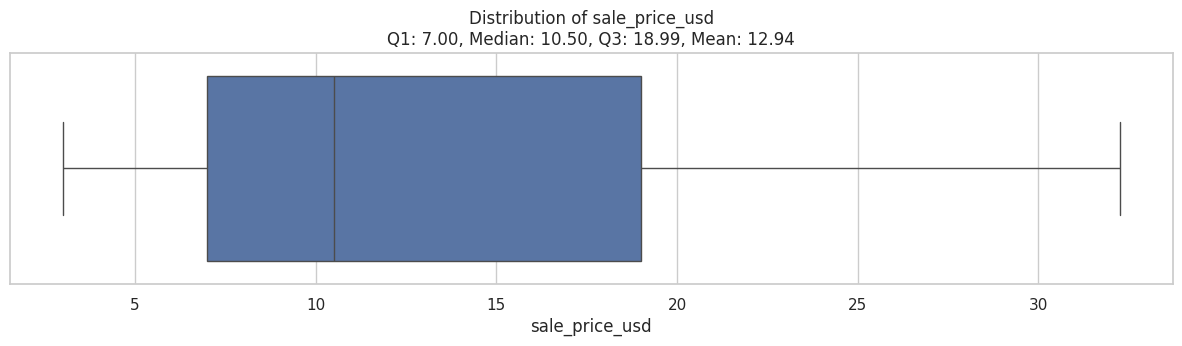

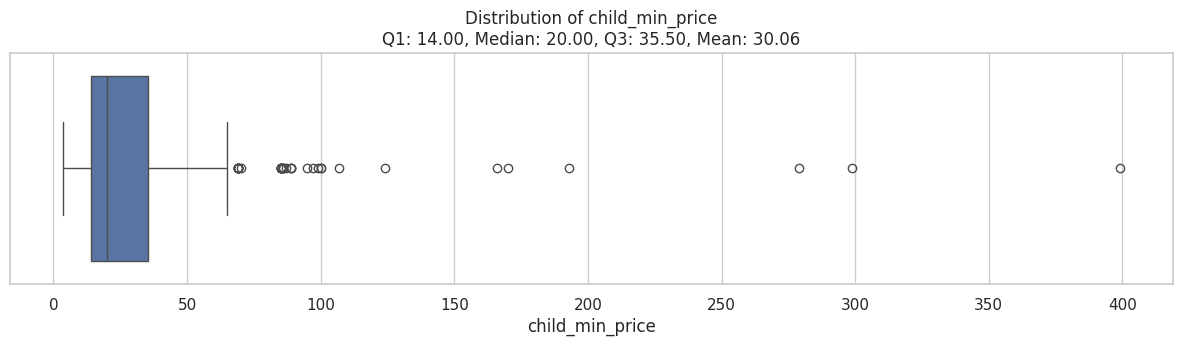

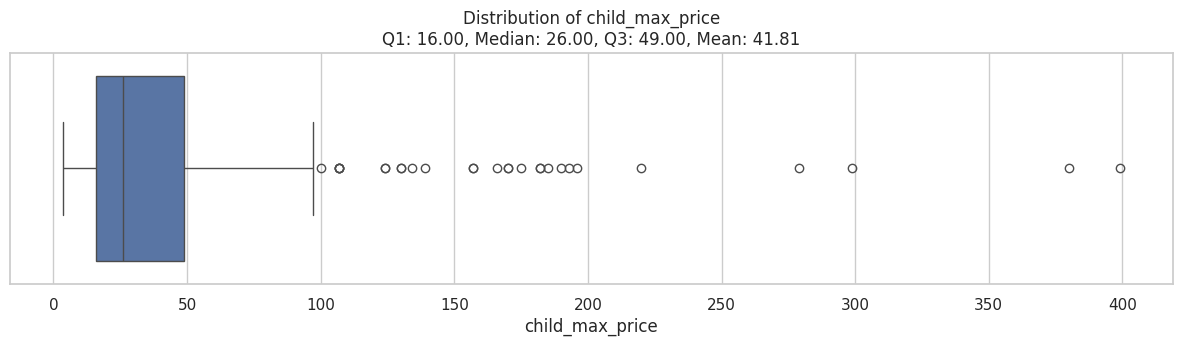

In [ ]:
columns_to_plot_box=['rating','price_usd','sale_price_usd','child_min_price','child_max_price']
for i,col in enumerate(columns_to_plot_box):
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=data_product[col])
    quantiles = np.quantile(data_product[col].dropna(), [0.25, 0.5, 0.75])
    mean = data_product[col].dropna().mean()
    title = f"Distribution of {col}\n"
    title += f"Q1: {quantiles[0]:.2f}, Median: {quantiles[1]:.2f}, Q3: {quantiles[2]:.2f}, Mean: {mean:.2f}"
    plt.title(title)
    plt.xlabel(f'{col}')
    plt.show()

When examining the box plot, we notice several data points that might initially appear as outliers. However, considering the context—consumer reviews and sale prices—these points may not truly be outliers. Consumer opinions can vary widely, as each individual has unique preferences, meaning their reviews shouldn’t be dismissed as anomalies. Similarly, high sale prices for particularly successful or premium products, like those in the fragrance category, shouldn’t be seen as outliers either. As we’ve observed, fragrance products often have a broader price range, which can lead to the "outliers" displayed on the box plot. One exception is a product priced above 1,750, which belongs to the skincare brand Shani Darden. After a quick check on their website, their products typically range up to $200, suggesting this is likely a typo.

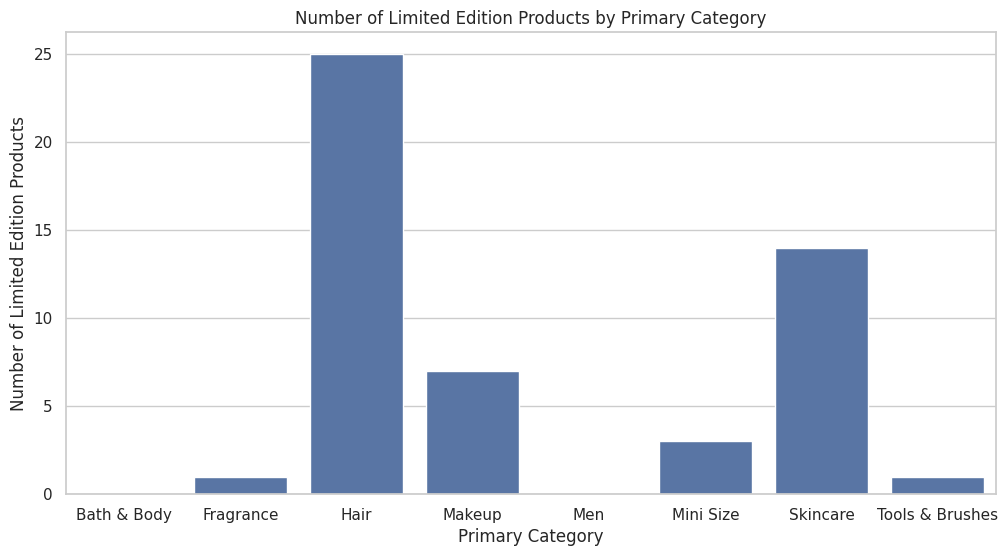

In [ ]:
num_limited_products_primery_category = data_product.groupby('primary_category')['limited_edition'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=num_limited_products_primery_category.index, y=num_limited_products_primery_category.values)
plt.title('Number of Limited Edition Products by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Number of Limited Edition Products')
plt.show()

We can observe that limited edition products are more commonly found in the primary categories of hair, makeup, and skincare. Now, let's explore whether there is a relationship between a product being labeled as a limited edition and its price.

In [ ]:
import scipy.stats as stats
x=data_product['limited_edition']
y=data_product['price_usd']
stats.pointbiserialr(x, y)



SignificanceResult(statistic=0.06786742141015417, pvalue=0.00383907475615179)

As we can see, there is no significant correlation between a product being categorized as a limited edition and its price.

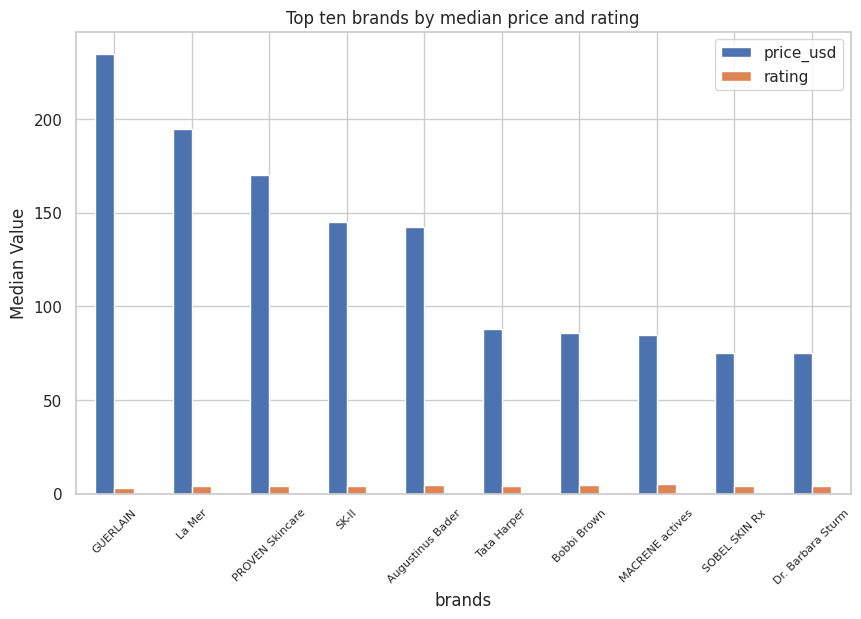

In [ ]:
#Let's take a closer look at the top-rated and most expensive brands in the skincare.
skin_brands = data_product[(data_product['primary_category'] == 'Skincare')&(data_product['brand_id'] !=6314)]
expensive_best_rating_brands = skin_brands.groupby('brand_name').agg({'price_usd': 'median', 'rating': 'median'})
top_brands = expensive_best_rating_brands.sort_values(by=['price_usd','rating'], ascending=False).head(10)
top_brands.plot(kind='bar', figsize=(10, 6))
plt.title('Top ten brands by median price and rating')
plt.xlabel('brands')
plt.ylabel('Median Value')
plt.xticks(rotation=45,fontsize=8)
plt.show()


##Reviews data

In [4]:
df_1=pd.read_csv('/content/reviews_0-250.csv')
df_2=pd.read_csv('/content/reviews_1250-end.csv')
df_3=pd.read_csv('/content/reviews_250-500.csv')
df_4=pd.read_csv('/content/reviews_500-750.csv')
df_5=pd.read_csv('/content/reviews_750-1250.csv')


In [ ]:
df_1.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
#lets look at the shapes of all the reviews data frames
list_of_dfs=[df_1,df_2,df_3,df_4,df_5]
for i in list_of_dfs:
  print(i.shape)

(602130, 19)
(49977, 19)
(206725, 19)
(116262, 19)
(119317, 19)


In [6]:
#combine the all the data frames one under the other
all_reviews=pd.concat(list_of_dfs,axis=0)

In [7]:
#checking the concatination was done corectly
num_rows=0
for i in list_of_dfs:
  num_rows+=i.shape[0]
print(num_rows)

1094411


In [8]:
print(all_reviews.shape)

(1094411, 19)


In [ ]:
#Let's examine the percentage of NaN values in each column of the all_reviews dataset.
all_reviews.isnull().sum() * 100 / len(all_reviews)

,0
Unnamed: 0,0.000000
author_id,0.000000
rating,0.000000
is_recommended,15.349626
helpfulness,51.314543
total_feedback_count,0.000000
total_neg_feedback_count,0.000000
total_pos_feedback_count,0.000000
submission_time,0.000000
review_text,0.131943


In [ ]:
all_reviews['rating'].unique()

array([5, 1, 4, 2, 3])

In [ ]:
#quick checking some reviews of ratign 3 like 20 examples  , kust the review text make google colab present the whole sentence

# Adjust display settings to show the full text
pd.set_option('display.max_colwidth', None)

# Now display the reviews
all_reviews[all_reviews['rating'] == 3][['review_text','rating']].sample(20)


,review_text,rating
1005113,"I’ve tried many things from the Herbivore line so far and this is my least favorite so far. I am not really sensitive to smells but boy this stuff smells truly awful. I really don’t understand the reviews saying that it smells “good“ and that makes me wonder if some batches of the product are turning bad. I have to cover up the scent by putting on some Mario Badescu rose toner right after. As far as balancing/toning benefits, I haven’t noticed anything worth writing home about. The 3 stars are for the clean ingredients and packaging.",3
545208,"Does a pretty good job making my dry skin feel hydrated. Once I got below half a bottle the rose petals started to clog the opening making it very difficult to get product out. I have to use tweezers to put them out of the opening, pretty annoying.",3
1003596,I got this for free to review from Influenster and have used it once so far. Overall I really liked the effects that the mask had on my skin. It hydrated and cleared it. The one thing that would make me not purchase this mask again is the texture. It is so chunky when scooping out and applying which makes it hard to apply and pretty messy!,3
425313,"So I bought this product because I’m currently on tretinoin for acne and I really neede something to help with dryness and peeling. While this does SAVE my dry skin, it also kind of breakers me out. (Or so I think so) This is why I have 3 stars but other than that this product is truly incredible for dryness and peeling.",3
446966,"I don’t know how to feel... this stuff is so strange. It is very awkward to apply, smells terrible, the exfoliating beads dissolve almost immediately, and it leaves your skin with that very weird squeaky feeling. On the other hand, my skin looks good after using it.",3
398862,"I wasn’t sure what to expect with an sample eye cream. Add it into my night time skincare routine. It didn’t irritate my super sensitive eyes. The cream is nice and cooling, that will also light moisturize. However, the scent is not for me #freeproduct",3
395784,"Not my favorite but I gave it 3 stars because it does what it’s meant to do just not the way it’s instructed and not as well as other similar products. Directions as stated tell you to rub it over the skin with dry hands then wet and essentially lather but when you do it this way it is way too thick (may be personal preference) and it feels like your roughly rubbing honey into your skin. That said if you wet your face first and then rub it into your skin it’s less this (still a lil thick and sticky thought) and it dissolves makeup a lot better but I have used plenty of different oil cleansers that work a lot better and aren’t as thick, they also can go right onto dry skin.",3
200089,"Hmm, I don’t know how I feel. I don’t think this project is anything extraordinary or different. It is not a bad moisturizer, and it feels nice on the skin. It’s lightweight and easy to wear, but does not feel special. I have seen no significant improvements in my skin, especially for this being an expensive product. It makes skin look nice but didn’t leave it feeling super hydrated.",3
478444,Love products from the Tatcha line. I was in need of a face serum but found this to leave my face super greasy. Felt heavy even using a little of the product. Using it at night only until finish the product. Didn’t notice any brightness in skin.,3
669694,"I got it because I turned 30 and felt like I needed a serum. As far as redness, wrinkles, brown spots, etc., I really can’t tell the difference after using for a couple months, but I have been getting more compliments on my complexion.",3


When performing sentiment analysis to classify feedback into two categories (good/bad), or even three, I found that comments with a 3-star rating often tell an interesting story. After reviewing these reviews, I, as a potential buyer, would likely avoid purchasing these products. Many of the comments suggest that the products don't necessarily solve the issue, or that similar quality can be found at a lower price. While these products aren't considered bad, the level of satisfaction expressed isn't strong enough to convince me to buy them. When using sentiment analysis to predict whether customers will repurchase a product or if it's worth continuing production, items with a 3-star rating wouldn't fall into the "I'm buying it" category.There for I decided to have just 2 categories - good/bad

In [9]:
#sentiment column
all_reviews['sentiment'] = all_reviews['rating'].apply(lambda x: 0 if x <= 3 else 1)

In [10]:
all_reviews['sentiment_text']=all_reviews['sentiment'].map({0:'negative',1:'positive'})

In [11]:
all_reviews = all_reviews.dropna(subset=['review_text'])

In [ ]:
#Percentage breakdown of positive, negative reviews.
all_reviews['sentiment_text'].value_counts()/len(all_reviews)*100

,count
sentiment_text,
positive,82.084272
negative,17.915728


We can observe that our dataset is imbalanced, as indicated by the product data, which contains more positive ratings than negative ones

In [ ]:
#checking duplicates in the data
print('Number of duplicated rows: ' , len(all_reviews[all_reviews.duplicated()]))

Number of duplicated rows:  0


In [ ]:
data_product['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

In [12]:
all_reviews = pd.merge(all_reviews, data_product[['product_id', 'secondary_category']], on='product_id', how='left')

In [ ]:
#"Let's examine the percentage of positive and negative ratings within each primary category.
all_reviews.groupby('secondary_category')['sentiment_text'].value_counts(normalize=True) * 100

secondary_category      sentiment_text
Cleansers               positive          82.879154
                        negative          17.120846
Eye Care                positive          80.429833
                        negative          19.570167
High Tech Tools         positive          76.014760
                        negative          23.985240
Lip Balms & Treatments  positive          80.867036
                        negative          19.132964
Masks                   positive          83.534617
                        negative          16.465383
Mini Size               positive          81.695828
                        negative          18.304172
Moisturizers            positive          85.336936
                        negative          14.663064
Self Tanners            positive          74.879227
                        negative          25.120773
Shop by Concern         positive          86.666667
                        negative          13.333333
Sunscreen               positive          80.918728
                        negative          19.081272
Treatments              positive          80.308786
                        negative          19.691214
Value & Gift Sets       positive          81.702763
                        negative          18.297237
Wellness                positive          64.734300
                        negative          35.265700
Name: proportion, dtype: float64

We can observe that there is class imbalance across all secondary category products.

Due to resource limitations, specifically in GPUs and memory, I will fine-tune the RoBERTa model only for the Moisturizers and Cleansers categories

In [13]:
interested_categories=['Moisturizers','Cleansers']

In [14]:
all_reviews_2 = all_reviews[all_reviews['secondary_category'].isin(interested_categories)]

In [ ]:
all_reviews_2.shape

(497414, 22)

We can conclude that, overall, customers are satisfied with the products, as reflected in their use of positive words such as 'love,' 'effective,' 'worth,' 'good,' 'holy grail,' 'must-have,' and 'best.' Additionally, it appears that customers are particularly interested in products designed to combat dry skin, such as moisturizers and hydrating formulations.

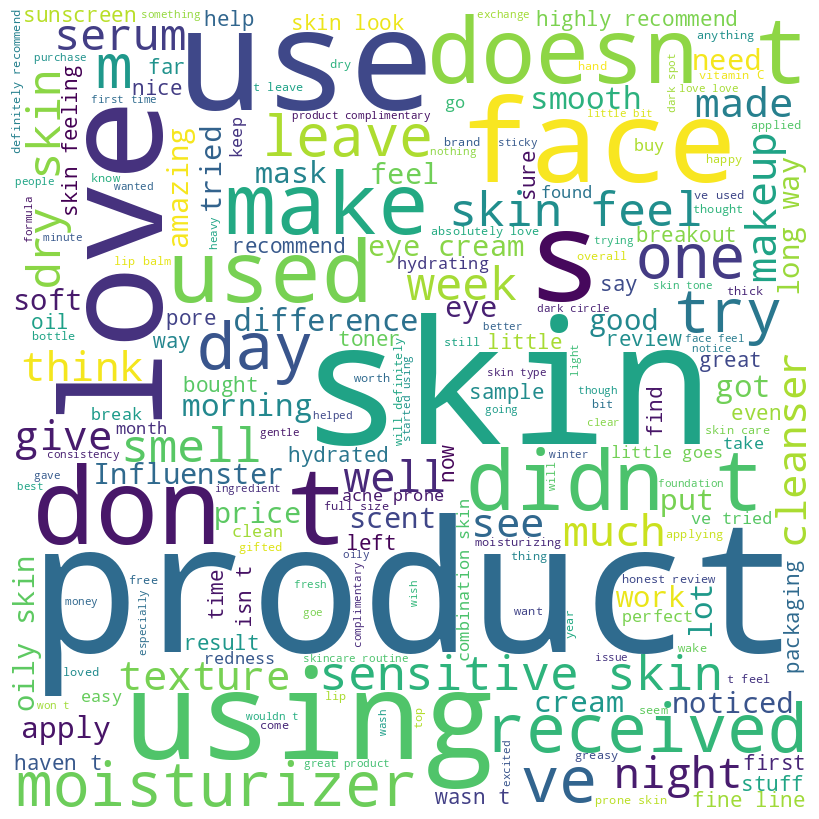

In [ ]:
review_text = all_reviews['review_text'].dropna()
text = ' '.join(review_text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Upon examining the detailed comments from customers, we notice that products addressing sensetive skin are frequently mentioned, and the topic of skin is one of the most popular. Additionally, the word 'love' appears quite often indicating product satisfaction

Lets look what words are mostly assosiated with good reviews

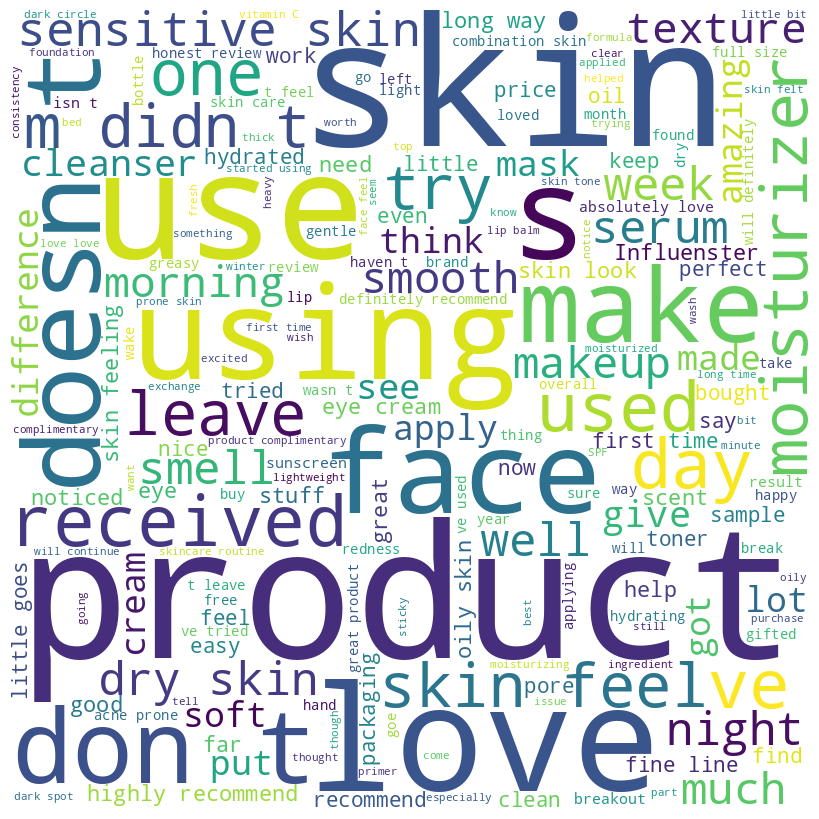

In [ ]:
from wordcloud import WordCloud, STOPWORDS
positive_reviews = all_reviews[all_reviews['sentiment'] == 1]
review_text_pos = positive_reviews['review_text']
text = ' '.join(review_text_pos)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We can see that words such as 'love,' 'amazing,' 'recommend,' 'well,' 'great,' 'gentle,' and others are strongly associated with positive reviews

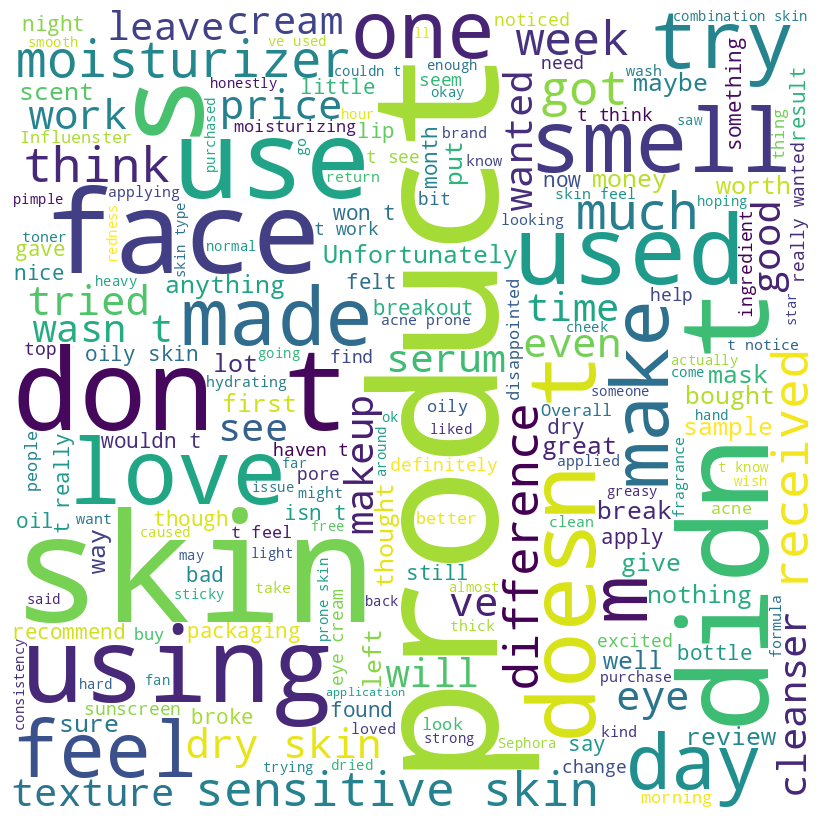

In [ ]:
bad_rev = all_reviews[all_reviews['sentiment'] == 0]
review_text = bad_rev['review_text']
text = ' '.join(review_text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We can observe that words such as 'price,' 'unfortunately,' 'redness,' and 'dry skin' are commonly associated with negative reviews.

# HTML Tags

In [19]:
#checking for HTMLS
import re
def find_html(text):
    html_pattern = r'<[^>]+>'
    return re.findall(html_pattern, text)
html_in_reviews = all_reviews['review_text'].apply(find_html)
html_in_reviews = html_in_reviews[html_in_reviews.str.len() > 0]

#Upper case words

Let's examine whether there are any words that are written entirely in uppercase. In sentiment analysis, such words can often indicate strong emotions.

In [ ]:
from itertools import chain

def is_upper_case(text):
  return [word for word in text.split() if word.isupper() and word != 'I']

unique_upper_words = set(chain.from_iterable(all_reviews['review_text'].apply(is_upper_case)))
print(unique_upper_words)

{'TEENS.', 'IUD,', 'AMC', 'NOPE,', 'SAVER.', 'SECONDS!!', 'SAME.', 'MI.', 'VOLA', 'AGGRESSIVE!', 'WOW!!!!!!!!!!', 'RADIANCE,', 'ENJOY', 'COSTS!', 'GYM', 'NC,', 'CHANGING!!!!!!!!!!!!', 'MITT', 'WOWW!!', 'SENSITIVE!!', 'STREAKED!!', 'AF!', 'HENRICKSON', 'UNFREAKINFBELIEVABLE.', 'EXISTED!', 'SPF!?', 'WHENEVER', 'RIDICULOUS', '(TLC', 'C.E.O', ':D.', 'HOL-E-SHET', 'HIGH!', 'EN', 'RETIN', 'HORRID.', '!RESULTS', '10:30PM.', 'OZ..', 'POCKET', 'C+B+E', 'IMPRESSED!!!!', 'INNBEAUTY.', 'SIDE', 'STRESS', 'ERNO', 'ED', 'HRT', 'XY', 'CONCENTRATE...U', 'INVESTMENT', 'REPURCHASING', 'NOTICABLE!!', 'STOCK.', 'MIRRORS', 'SPF!!!)', 'CDN$28', 'THIS,', 'ENCANTO', 'CORRECTION', 'HUUUGEEE', 'LOT...I', 'BC', 'HYDRATED,SOOTHED', 'WOOOOW,', 'OBVIOUSLY', 'YES-', 'SEVERELY', 'EVERYBODY!!', 'CLEAR!', 'ACID.', 'TEENAGE', 'EWG).', 'UPC', 'I,', 'ANYWHERE-', '(MURAD', 'LAST.', 'HAPPENED', 'DIFFICULT', 'OF”?', 'A-MAY-ZING.', 'LOVE>', 'FIXED', 'GOOD....AND', 'BS,', '“SHISEIDO', 'STRANGE', 'HAD!!', 'PLEASE.', 'INFLUENCEST

#URLS


In [17]:
#checking if there are URLS in the data
def find_urls(text):
    url_pattern = r'(https?://\S+|www\.\S+)'
    return re.findall(url_pattern, text)
urls_in_reviews = all_reviews['review_text'].apply(find_urls)
urls_in_reviews = urls_in_reviews[urls_in_reviews.str.len() > 0]


In [ ]:
sentence = "Check out this website: https://www.example.com and this one: http://anothersite.net."

tokens = tokenizer.tokenize(sentence)
print(tokens)

original = tokenizer.convert_tokens_to_string(tokens)
print(original)

['Check', 'Ġout', 'Ġthis', 'Ġwebsite', ':', 'Ġhttps', '://', 'www', '.', 'example', '.', 'com', 'Ġand', 'Ġthis', 'Ġone', ':', 'Ġhttp', '://', 'another', 'site', '.', 'net', '.']
Check out this website: https://www.example.com and this one: http://anothersite.net.


#Tags

In [16]:
def find_at_symbols(text):
    at_pattern = r'@'
    return re.findall(at_pattern, text)
at_symbols_in_reviews = all_reviews['review_text'].apply(find_at_symbols)
at_symbols_in_reviews = at_symbols_in_reviews[at_symbols_in_reviews.str.len() > 0]


In [ ]:
sentence = "Hey @username, check this out! Also, @anotheruser might be interested."

tokens = tokenizer.tokenize(sentence)
print(tokens)

original = tokenizer.convert_tokens_to_string(tokens)
print(original)

['Hey', 'Ġ@', 'username', ',', 'Ġcheck', 'Ġthis', 'Ġout', '!', 'ĠAlso', ',', 'Ġ@', 'another', 'user', 'Ġmight', 'Ġbe', 'Ġinterested', '.']
Hey @username, check this out! Also, @anotheruser might be interested.


# checking for emojis

In [15]:
def find_emojis(text):
    emoji_pattern = re.compile(
        r'['
        u'\U0001F600-\U0001F64F'  # Emoticons
        u'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
        u'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
        u'\U0001F700-\U0001F77F'  # Alchemical Symbols
        u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        u'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        u'\U0001FA00-\U0001FA6F'  # Chess Symbols
        u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        u'\U00002702-\U000027B0'  # Dingbats
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emoji_pattern.findall(text)
emojis_in_reviews = all_reviews['review_text'].apply(find_emojis)
emojis_in_reviews = emojis_in_reviews[emojis_in_reviews.str.len() > 0]

Testing if RoBERTA model can tokenize the emojies

In [ ]:
from transformers import RobertaModel, RobertaTokenizer

In [ ]:

# Load the tokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=False)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
a=tokenizer.tokenize("Mixed feelings about this 🤔🤷‍♂️")
print(a)

['M', 'ixed', 'Ġfeelings', 'Ġabout', 'Ġthis', 'ĠðŁ', '¤', 'Ķ', 'ðŁ', '¤', '·', 'âĢ', 'į', 'âĻ', 'Ĥ', 'ï¸ı']


In [ ]:
original_sentence = tokenizer.convert_tokens_to_string(a)
print(original_sentence)

Mixed feelings about this 🤔🤷‍♂️


In [ ]:
#LETS TRY ANOTHER SENTENCE WITH HEART TOKENS WHICH ARE RELEVANT FOR THIS TOPIC
b=tokenizer.tokenize("I love this product ❤️❤️❤️❤️❤️❤️❤️")
print(b)

['I', 'Ġlove', 'Ġthis', 'Ġproduct', 'ĠâĿ', '¤', 'ï¸ı', 'âĿ', '¤', 'ï¸ı', 'âĿ', '¤', 'ï¸ı', 'âĿ', '¤', 'ï¸ı', 'âĿ', '¤', 'ï¸ı', 'âĿ', '¤', 'ï¸ı', 'âĿ', '¤', 'ï¸ı']


In [ ]:
#now lets decode it back to the original sentence
original_sentence = tokenizer.convert_tokens_to_string(b)
print(original_sentence)

I love this product ❤️❤️❤️❤️❤️❤️❤️


The tokenizer performs well, effectively recognizing and tokenizing HTML elements, URLs, emojis, and tags.✌

In [ ]:
#does it tokenize tags like @username?
c=tokenizer.tokenize("@username used this")
print(c)
original_sentence = tokenizer.convert_tokens_to_string(c)
print(original_sentence)

['@', 'username', 'Ġused', 'Ġthis']
@username used this


In [ ]:
#and does it tokenize URL?
d=tokenizer.tokenize("Check out this website: https://www.example.com and this one: http://anothersite.net.")
print(d)
original_sentence = tokenizer.convert_tokens_to_string(d)
print(original_sentence)

['Check', 'Ġout', 'Ġthis', 'Ġwebsite', ':', 'Ġhttps', '://', 'www', '.', 'example', '.', 'com', 'Ġand', 'Ġthis', 'Ġone', ':', 'Ġhttp', '://', 'another', 'site', '.', 'net', '.']
Check out this website: https://www.example.com and this one: http://anothersite.net.


In [ ]:
#and does it tokenize HTML ?
e=tokenizer.tokenize("This is a sentence with some <b>bold</b> text and a <a href='https://www.example.com'>link</a>.")
print(e)
original_sentence = tokenizer.convert_tokens_to_string(e)
print(original_sentence)

['This', 'Ġis', 'Ġa', 'Ġsentence', 'Ġwith', 'Ġsome', 'Ġ<', 'b', '>', 'bold', '</', 'b', '>', 'Ġtext', 'Ġand', 'Ġa', 'Ġ<', 'a', 'Ġhref', "='", 'https', '://', 'www', '.', 'example', '.', 'com', "'>", 'link', '</', 'a', '>.']
This is a sentence with some <b>bold</b> text and a <a href='https://www.example.com'>link</a>.


so far looks good!

## Fine tuning RoBERTA

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig

In [ ]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
new_df=all_reviews_2[['review_text','sentiment']]

In [ ]:
new_df.shape

(497414, 2)

In [ ]:
new_df.head()

,review_text,sentiment
0,I use this with the Nudestix “Citrus Clean Bal...,1
16085,"I really wanted to love this, and I would’ve i...",0
16086,"Makeup remover, gentle cleanser, and all aroun...",1
16087,I have been using this for almost 10 years. Lo...,1
16088,I wanted to love this so bad because it felt s...,0


#Loading the data

In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 8
TEST_BATCH_SIZE = 8
EPOCHS = 5
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=False)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
#=precentage the number of posotove negative and neutral reviews
new_df['sentiment'].value_counts()/len(new_df)*100

,count
sentiment,
1,82.873622
0,17.126378


In [ ]:
new_df['sentiment'].value_counts()

,count
sentiment,
1,412225
0,85189


In [ ]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.review_text
        self.targets = self.data.sentiment
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),#1 if masked 0 if not
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)#The sentiment label for this text.
        }

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into train+validation and test sets
train_val_size = 0.8
train_val_data = new_df.sample(frac=train_val_size, random_state=200)
test_data = new_df.drop(train_val_data.index).reset_index(drop=True)

# Now split train_val_data into train and validation sets
# Validation set will be 10% of train_val_data, which is 12.5% of the original train set (0.1 / 0.8 = 0.125)
train_data, val_data = train_test_split(train_val_data, test_size=0.125, random_state=200)

# Reset indices
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("VALIDATION Dataset: {}".format(val_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
validation_set = SentimentData(val_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

FULL Dataset: (497414, 2)
TRAIN Dataset: (348189, 2)
VALIDATION Dataset: (49742, 2)
TEST Dataset: (99483, 2)


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': TEST_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
Validation_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)
validation_loader = DataLoader(validation_set, **Validation_params)

#Creating the Neural Network for Fine Tuning

In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 2)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = RobertaClass()
model.to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [ ]:
count_clases=new_df['sentiment'].value_counts()
count_clases

,count
sentiment,
1,412225
0,85189


In [ ]:
class_weights = np.array(count_clases/np.sum(count_clases))
class_weights

array([0.82873622, 0.17126378])

In [ ]:
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

In [ ]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

#Training

In [ ]:
#After every 2500 steps the loss value is printed in the console.

Training Epoch 1: 0it [00:00, ?it/s]

Training Loss per 2500 steps: 0.6910901665687561


Training Epoch 1: 2502it [07:00,  5.96it/s]

Training Loss per 2500 steps: 0.2017936325372859


Training Epoch 1: 5002it [13:59,  5.95it/s]

Training Loss per 2500 steps: 0.18037458800242748


Training Epoch 1: 7502it [20:57,  5.95it/s]

Training Loss per 2500 steps: 0.1711784445983876


Training Epoch 1: 10002it [27:56,  5.97it/s]

Training Loss per 2500 steps: 0.16578575750019853


Training Epoch 1: 12502it [34:54,  5.98it/s]

Training Loss per 2500 steps: 0.16159363243163496


Training Epoch 1: 15002it [41:53,  5.79it/s]

Training Loss per 2500 steps: 0.15840344901667597


Training Epoch 1: 17502it [48:51,  5.97it/s]

Training Loss per 2500 steps: 0.15611588892665523


Training Epoch 1: 20002it [55:50,  5.97it/s]

Training Loss per 2500 steps: 0.15426628074591073


Training Epoch 1: 21762it [1:00:45,  5.97it/s]


Training Loss Epoch 1: 0.1531819113577112
Training F1 Scores: [0.85516385 0.96659451]
Training Macro F1 Score: 0.9108791795829562


Validation Epoch 1: 6218it [03:36, 28.78it/s]


Validation Loss Epoch 1: 0.12680090715028478
Validation F1 Scores: [0.87525258 0.97092144]
Validation Macro F1 Score: 0.9230870098767355
Best model saved with Validation Loss: 0.12680090715028478


Training Epoch 2: 1it [00:00,  9.37it/s]

Training Loss per 2500 steps: 0.08146697282791138


Training Epoch 2: 2502it [06:58,  5.96it/s]

Training Loss per 2500 steps: 0.12739364925289906


Training Epoch 2: 5002it [13:57,  5.95it/s]

Training Loss per 2500 steps: 0.12793843475346606


Training Epoch 2: 7502it [20:55,  5.96it/s]

Training Loss per 2500 steps: 0.127457672980891


Training Epoch 2: 10002it [27:54,  5.98it/s]

Training Loss per 2500 steps: 0.12704843294534346


Training Epoch 2: 12502it [34:52,  5.98it/s]

Training Loss per 2500 steps: 0.1268670265342406


Training Epoch 2: 15002it [41:51,  5.97it/s]

Training Loss per 2500 steps: 0.12695931024024568


Training Epoch 2: 17502it [48:49,  5.98it/s]

Training Loss per 2500 steps: 0.12563170155152406


Training Epoch 2: 20002it [55:48,  5.98it/s]

Training Loss per 2500 steps: 0.12577527086456528


Training Epoch 2: 21762it [1:00:43,  5.97it/s]


Training Loss Epoch 2: 0.12558469995702326
Training F1 Scores: [0.87901506 0.97249711]
Training Macro F1 Score: 0.9257560890020772


Validation Epoch 2: 6218it [03:35, 28.83it/s]


Validation Loss Epoch 2: 0.13579740232790496
Validation F1 Scores: [0.8626536  0.96696884]
Validation Macro F1 Score: 0.9148112200522205


Training Epoch 3: 1it [00:00,  9.68it/s]

Training Loss per 2500 steps: 0.13551950454711914


Training Epoch 3: 2502it [06:58,  5.98it/s]

Training Loss per 2500 steps: 0.11096217137680794


Training Epoch 3: 5002it [13:57,  5.98it/s]

Training Loss per 2500 steps: 0.11354687295512271


Training Epoch 3: 7502it [20:55,  5.97it/s]

Training Loss per 2500 steps: 0.11106998099331018


Training Epoch 3: 10002it [27:54,  5.97it/s]

Training Loss per 2500 steps: 0.1102292752078483


Training Epoch 3: 12502it [34:52,  5.98it/s]

Training Loss per 2500 steps: 0.11061069951047217


Training Epoch 3: 15002it [41:51,  5.98it/s]

Training Loss per 2500 steps: 0.11090735670193222


Training Epoch 3: 17502it [48:50,  5.98it/s]

Training Loss per 2500 steps: 0.11106444418397707


Training Epoch 3: 20002it [55:48,  5.97it/s]

Training Loss per 2500 steps: 0.11087296717300174


Training Epoch 3: 21762it [1:00:43,  5.97it/s]


Training Loss Epoch 3: 0.11094466665361125
Training F1 Scores: [0.89219522 0.97571352]
Training Macro F1 Score: 0.9339543744584573


Validation Epoch 3: 6218it [03:35, 28.82it/s]


Validation Loss Epoch 3: 0.13797910230093624
Validation F1 Scores: [0.88544555 0.97401685]
Validation Macro F1 Score: 0.9297311976050356
Early stopping triggered!


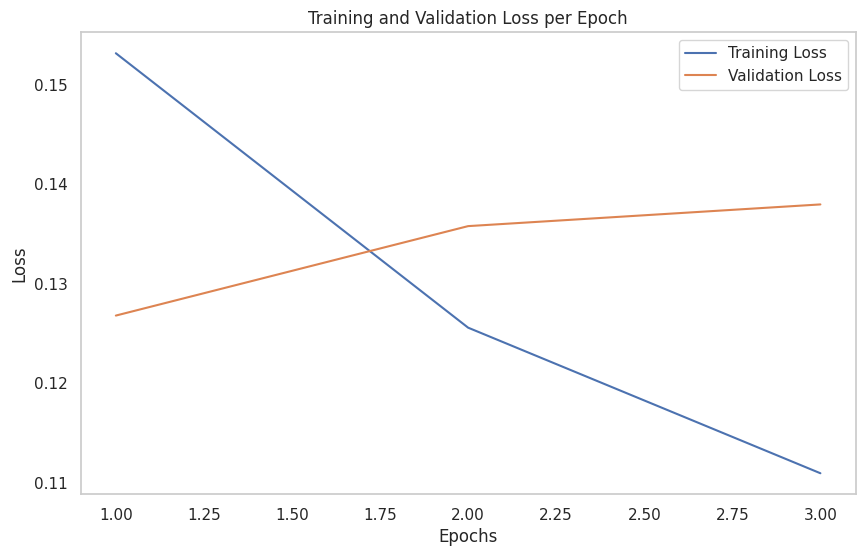

Training and Validation completed!


In [ ]:
from sklearn.metrics import f1_score
import os
def train_and_validate(epochs, model, training_loader, validation_loader, loss_function, optimizer, device, patience=2):
    model_save_path = '/content/drive/MyDrive/best_model.pt'
    os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training
        model.train()
        tr_loss = 0
        all_tr_targets = []
        all_tr_outputs = []
        nb_tr_steps = 0

        for _, data in tqdm(enumerate(training_loader, 0), desc=f"Training Epoch {epoch+1}"):
            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.long)
            outputs = model(ids, mask, token_type_ids)
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()

            big_val, big_idx = torch.max(outputs.data, dim=1)
            all_tr_targets.extend(targets.cpu().detach().numpy())
            all_tr_outputs.extend(big_idx.cpu().detach().numpy())
            nb_tr_steps += 1
            if _ % 2500 == 0:
                loss_step = tr_loss / nb_tr_steps
                print(f"Training Loss per 2500 steps: {loss_step}")

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()



        epoch_loss = tr_loss / nb_tr_steps
        train_losses.append(epoch_loss)

        tr_f1_scores = f1_score(all_tr_targets, all_tr_outputs, average=None)
        tr_macro_f1 = np.mean(tr_f1_scores)
        print(f"Training Loss Epoch {epoch+1}: {epoch_loss}")
        print(f"Training F1 Scores: {tr_f1_scores}")
        print(f"Training Macro F1 Score: {tr_macro_f1}")

        # Validation
        model.eval()
        val_loss = 0
        all_val_targets = []
        all_val_outputs = []
        nb_val_steps = 0

        with torch.no_grad():
            for _, data in tqdm(enumerate(validation_loader, 0), desc=f"Validation Epoch {epoch+1}"):
                ids = data['ids'].to(device, dtype=torch.long)
                mask = data['mask'].to(device, dtype=torch.long)
                token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
                targets = data['targets'].to(device, dtype=torch.long)

                outputs = model(ids, mask, token_type_ids)
                loss = loss_function(outputs, targets)
                val_loss += loss.item()

                big_val, big_idx = torch.max(outputs.data, dim=1)
                all_val_targets.extend(targets.cpu().detach().numpy())
                all_val_outputs.extend(big_idx.cpu().detach().numpy())

                nb_val_steps += 1

        val_epoch_loss = val_loss / nb_val_steps
        val_losses.append(val_epoch_loss)

        val_f1_scores = f1_score(all_val_targets, all_val_outputs, average=None)
        val_macro_f1 = np.mean(val_f1_scores)
        print(f"Validation Loss Epoch {epoch+1}: {val_epoch_loss}")
        print(f"Validation F1 Scores: {val_f1_scores}")
        print(f"Validation Macro F1 Score: {val_macro_f1}")

        # Early stopping logic
        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            patience_counter = 0  # Reset the patience counter if loss improves
            torch.save(model.state_dict(), model_save_path)  # Save best model to Google Drive
            print(f"Best model saved with Validation Loss: {best_val_loss}")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    # Plot training and validation losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.legend()
    plt.grid()
    plt.show()

    print("Training and Validation completed!")

# Usage
epochs = 5
train_and_validate(epochs, model, training_loader, validation_loader, loss_function, optimizer, device)


The early stopping rule was triggered at epoch 3, indicating that further training would likely result in overfitting. Additionally, the validation loss is lower than the training loss, which may be due to the validation samples being drawn from the training set, resulting in high similarity between the two.

In [ ]:
# Load the model
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pt'))
model.to(device)


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [ ]:
#test data
def test_my_model(model, testing_loader,device):
    model.eval()
    all_test_targets = []
    all_test_outputs = []
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids)
            big_val, big_idx = torch.max(outputs, dim=1)
            all_test_targets.extend(targets.cpu().detach().numpy())
            all_test_outputs.extend(big_idx.cpu().detach().numpy())
    test_f1_scores = f1_score(all_test_targets, all_test_outputs, average=None)
    test_macro_f1 = np.mean(test_f1_scores)
    print(f"test F1 Scores: {test_f1_scores}")
    print(f"test Macro F1 Score: {test_macro_f1}")
test_my_model(model, testing_loader,device)

12436it [07:12, 28.73it/s]


test F1 Scores: [0.87360803 0.97069695]
test Macro F1 Score: 0.922152489278171


After applying our model to the test dataset, we observed high F1 scores for both the positive and negative classes, indicating strong performance in balancing precision and recall. This means the model effectively identifies true positives while minimizing false positives and negatives. In our case, with an imbalanced dataset, the F1 score is especially valuable as it offers a more insightful evaluation than accuracy alone, showing the model’s ability to distinguish between sentiment classes with optimized precision and recall.